# Research Question

Can we accurately predict if the upcoming anime/manga will become popular or not based on its genres, ranking, and other features? What are the factors that can make audiences value or like a particular anime/manga even more?

# Dataset Exploration

To answer this question, let's use the "animes.csv" that was downloaded from Kaggle and into the repository.               
Before using it though, let's first study it.

In [1]:
import pandas as pd

In [2]:
animes_df = pd.read_csv("animes.csv")
animes_df.head()

,uid,title,synopsis,genre,aired,episodes,members,popularity,ranked,score,img_url,link
0,28891,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...","Oct 4, 2015 to Mar 27, 2016",25.0,489888,141,25.0,8.82,https://cdn.myanimelist.net/images/anime/9/766...,https://myanimelist.net/anime/28891/Haikyuu_Se...
1,23273,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...","Oct 10, 2014 to Mar 20, 2015",22.0,995473,28,24.0,8.83,https://cdn.myanimelist.net/images/anime/3/671...,https://myanimelist.net/anime/23273/Shigatsu_w...
2,34599,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...","Jul 7, 2017 to Sep 29, 2017",13.0,581663,98,23.0,8.83,https://cdn.myanimelist.net/images/anime/6/867...,https://myanimelist.net/anime/34599/Made_in_Abyss
3,5114,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...","Apr 5, 2009 to Jul 4, 2010",64.0,1615084,4,1.0,9.23,https://cdn.myanimelist.net/images/anime/1223/...,https://myanimelist.net/anime/5114/Fullmetal_A...
4,31758,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']","Jan 6, 2017",1.0,214621,502,22.0,8.83,https://cdn.myanimelist.net/images/anime/3/815...,https://myanimelist.net/anime/31758/Kizumonoga...


In [3]:
animes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19311 entries, 0 to 19310
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   uid         19311 non-null  int64  
 1   title       19311 non-null  object 
 2   synopsis    18336 non-null  object 
 3   genre       19311 non-null  object 
 4   aired       19311 non-null  object 
 5   episodes    18605 non-null  float64
 6   members     19311 non-null  int64  
 7   popularity  19311 non-null  int64  
 8   ranked      16099 non-null  float64
 9   score       18732 non-null  float64
 10  img_url     19131 non-null  object 
 11  link        19311 non-null  object 
dtypes: float64(3), int64(3), object(6)
memory usage: 1.8+ MB


The "animes.csv" shows a list of anime with the following features:
1. uid - The ID of the anime/manga
2. title - The title of the anime/manga
3. synopsis - A brief intro to what the anime/manga is about
4. genre - The list of genres the anime/manga is assigned to
5. aired - When it started airing and when it ended
6. episodes - The number of episodes
7. members - The number of users that have that entry in their anime/manga list
8. popularity - The overall position of the entry by how many users have that in their anime/manga list
9. ranked - The overall position of the entry sorted by how users score the work, from highest to lowest.
10. score - The overall rating score on a scale from 1 to 10, from worse to best.
11. img_url - Basically the image url of the corresponding anime/manga
12. link - The MyAnimeList link of the corresponding anime/manga

# Dataset Cleaning

On first glance, I believe uid, aired, img_url, and link are unnecessary infos for the training of any model. Thus, I'm going to remove those.

In [4]:
animes_df = animes_df.drop(columns = ['uid', 'aired', 'img_url', 'link'])
animes_df.head()

,title,synopsis,genre,episodes,members,popularity,ranked,score
0,Haikyuu!! Second Season,Following their participation at the Inter-Hig...,"['Comedy', 'Sports', 'Drama', 'School', 'Shoun...",25.0,489888,141,25.0,8.82
1,Shigatsu wa Kimi no Uso,Music accompanies the path of the human metron...,"['Drama', 'Music', 'Romance', 'School', 'Shoun...",22.0,995473,28,24.0,8.83
2,Made in Abyss,The Abyss—a gaping chasm stretching down into ...,"['Sci-Fi', 'Adventure', 'Mystery', 'Drama', 'F...",13.0,581663,98,23.0,8.83
3,Fullmetal Alchemist: Brotherhood,"""In order for something to be obtained, someth...","['Action', 'Military', 'Adventure', 'Comedy', ...",64.0,1615084,4,1.0,9.23
4,Kizumonogatari III: Reiketsu-hen,After helping revive the legendary vampire Kis...,"['Action', 'Mystery', 'Supernatural', 'Vampire']",1.0,214621,502,22.0,8.83


When looking at the column genre, we would see a list of genres. However, when looking at the element's type, it's not a list but a string as I will show below.

In [5]:
animes_df['genre'][0]

"['Comedy', 'Sports', 'Drama', 'School', 'Shounen']"

In [6]:
type(animes_df['genre'][0])

str

Thus, let's change the element's type in column genre into that of a list using eval().

In [7]:
animes_df['genre'] = animes_df['genre'].map(eval)
type(animes_df['genre'][0])

list

When exploring the DataFrame, I've noticed two "Death Note".

In [8]:
animes_df.query('popularity == 1')

,title,synopsis,genre,episodes,members,popularity,ranked,score
740,Death Note,"A shinigami, as a god of death, can kill any p...","[Mystery, Police, Psychological, Supernatural,...",37.0,1871043,1,52.0,8.65
17762,Death Note,"A shinigami, as a god of death, can kill any p...","[Mystery, Police, Psychological, Supernatural,...",37.0,1871043,1,52.0,8.65


This shows that there are duplicate animes/mangas which would provide bias towards any model training and reduce the model's robustness to generalize data.                                                                                     
The following code below confirms it.

In [9]:
duplicate_df = animes_df.copy()
duplicate_df['genre'] = duplicate_df['genre'].apply(tuple)
duplicate_df.duplicated().any()

True

Thus, let's remove the duplicates.

In [10]:
len(animes_df)

19311

It seems that having a column with lists as elements hinders some pandas codes like drop_duplicates().                                            
Thus, we shall change column genre's elements from list to tuple.

In [11]:
animes_df['genre'] = animes_df['genre'].apply(tuple)
animes_df = animes_df.drop_duplicates()
len(animes_df)

16368

After dropping some duplicates, some indices will be deleted.                                                              
Let's reset for new indices and drop the old ones.

In [12]:
animes_df = animes_df.reset_index().drop(columns = 'index')

------------------------------

Notice that the popularity rank is based on the number of members in the corresponding anime.                              
Thus, let the column "members" be the targeted variable that we shall predict.

Let's now explore the available features that we may use to predict the number of members.

# Synopsis (Natural Language Processing)

We can have the synopsis as the corpus so let's use it to train the NLP model to try to predict the number of members.

## Exploring
To refamiliarize myself on NLP, I'll first play around with NLP.

In [13]:
import nltk
import pandas as pd
from nltk import word_tokenize, sent_tokenize

In [14]:
# Word Tokenize
corpus = animes_df['synopsis'][0]
words = word_tokenize(corpus)
print(words[:5])

['Following', 'their', 'participation', 'at', 'the']


In [15]:
# Sentence Tokenize
sentences = sent_tokenize(corpus)
sentences[:2]

['Following their participation at the Inter-High, the Karasuno High School volleyball team attempts to refocus their efforts, aiming to conquer the Spring tournament instead.',
 'When they receive an invitation from long-standing rival Nekoma High, Karasuno agrees to take part in a large training camp alongside many notable volleyball teams in Tokyo and even some national level players.']

In [16]:
# Unique Words
unique_words = set(words)
print(unique_words)

{'MAL', 'refocus', 'large', 'agrees', 'efforts', 'than', 'Following', 'their', 'camp', 'Japan', 'some', 'Kageyama', 'archrival', 'new', 'not', 'Facing', 'must', 'volleyball', 'invitation', 'level', 'chance', 'of', 'also', 'blocks', 'last', 'playing', 'toughest', 'at', 'even', 'receive', 'Nekoma', 'but', 'alongside', 'could', 'Tooru', 'harder', 'up', 'Inter-High', 'victory', 'them', 'more', 'Rewrite', 'and', 'Tokyo', 'conquer', 'with', 'Oikawa', 'break', 'Karasuno', 'rival', 'what', 'Aoba', '.', 'sharpen', 'that', 'its', 'participation', 'be', 'train', 'in', 'When', 'skills', 'a', 'Jousai', 'strengthen', 'By', 'to', 'School', 'attempts', 'differences', 'Spring', 'may', 'take', 'team', 'part', 'would', 'they', 'senior', 'come', 'possibly', '[', 'many', 'High', 'overcome', ',', "'s", 'Hinata', 'devise', 'an', 'before', 'formidable', 'notable', 'the', 'learn', 'training', 'national', 'weapon', 'from', 'graduate', 'powerful', 'settle', 'Written', 'instead', 'one', 'members', 'attacks', 'hop

In [17]:
# Number of Words
len(words)

177

In [18]:
# Word Diversity
lexical_diversity = len(unique_words) / len(words)
print(lexical_diversity)
print(len(unique_words))
print(len(words))

0.7062146892655368
125
177


In [19]:
nlp_df = animes_df[['synopsis', 'members']]
nlp_df.head()

,synopsis,members
0,Following their participation at the Inter-Hig...,489888
1,Music accompanies the path of the human metron...,995473
2,The Abyss—a gaping chasm stretching down into ...,581663
3,"""In order for something to be obtained, someth...",1615084
4,After helping revive the legendary vampire Kis...,214621


In [20]:
# Determine the number of unique words in the nlp_df
# ans1 = len(set(nlp_df['synopsis'].apply(word_tokenize).sum()))

In [21]:
# Will receive a TypeError expecting a string or bytes-like object
# This means that not all synopsis are type string or bytes-like object
# Checking all unique types of all elements in column synopsis
set([type(nlp_df['synopsis'][i]) for i in range(0, len(nlp_df))])

{float, str}

In [22]:
# Some elements are float.
# Let's see what the 'float' elements look like.
float_synopsis = nlp_df[nlp_df['synopsis'].apply(lambda x: isinstance(x, float))]
float_synopsis

,synopsis,members
29,NaN,11600
31,NaN,20779
42,NaN,5238
212,NaN,8711
216,NaN,75929
...,...,...
16101,NaN,4598
16130,NaN,7229
16161,NaN,1339
16319,NaN,1246


In [23]:
print(len(nlp_df))

16368


In [24]:
# Yikes!!! Some synopsis are null. Let's drop them.
nlp_df = nlp_df.dropna(subset = 'synopsis')
print(len(nlp_df))

15583


In [25]:
# Let's reset the indices yet again.
nlp_df = nlp_df.reset_index().drop(columns = 'index')

In [26]:
# Let's again determine the number of unique words in the modified nlp_df
ans1 = len(set(nlp_df['synopsis'].apply(word_tokenize).sum()))
ans1

57791

In [27]:
# Let's now create speech tags from the first synopsis
words_pos = nltk.pos_tag(words)
print(words_pos[:5])

[('Following', 'VBG'), ('their', 'PRP$'), ('participation', 'NN'), ('at', 'IN'), ('the', 'DT')]


In [28]:
# Find words with named entity label
named_entities = []

# Iterate through the result of the ne_chunk function on the part-of-speech tagged words
for word in nltk.ne_chunk(words_pos):
    # Check if the current word has a 'label' attribute
    if hasattr(word,'label'):
        # If it does, extract the name by joining the leaves (individual words) of the named entity
        the_name = ' '.join(name[0] for name in word.leaves())
        # Get the type (label) of the named entity
        the_type = word.label()
        # Append a tuple containing the name and type to the named_entities list
        named_entities.append((the_name, the_type))

# Print the first 5 named entities and their types
print(named_entities[:5])

[('Karasuno High School', 'ORGANIZATION'), ('Nekoma High', 'ORGANIZATION'), ('Karasuno', 'PERSON'), ('Tokyo', 'GPE'), ('Japan', 'GPE')]


In [29]:
# Include only GPE words, i.e. GeoPolitical Entities.
places = []

for word in named_entities:
    if word[1] == 'GPE':
        places.append(word[0].lower())
        
print(places)

['tokyo', 'japan', 'kageyama', 'karasuno']


In [30]:
# Removing stopwords
from nltk.corpus import stopwords

swords = stopwords.words('english')
no_stops = [word for word in places if not word in swords]
print(no_stops)

['tokyo', 'japan', 'kageyama', 'karasuno']


## Preprocessing Text (Stemming & Lemmatizing)

In [31]:
# Let's use stemmer to apply onto the synopsis of the nlp_df
from nltk.stem import PorterStemmer, WordNetLemmatizer

def stemmer(text):
    stem_words = [PorterStemmer().stem(word) for word in word_tokenize(text)]
    return ' '.join(stem_words)

In [32]:
stemmed_content = nlp_df['synopsis'].apply(stemmer)
stemmed_content.head()

0    follow their particip at the inter-high , the ...
1    music accompani the path of the human metronom...
2    the abyss—a gape chasm stretch down into the d...
3    `` in order for someth to be obtain , someth o...
4    after help reviv the legendari vampir kiss-sho...
Name: synopsis, dtype: object

In [33]:
# Let's use lemmatizer instead
def lemmatizer(text):
    lem_words = [WordNetLemmatizer().lemmatize(word) for word in word_tokenize(text)]
    return ' '.join(lem_words)

In [34]:
lemmatized_content = nlp_df['synopsis'].apply(lemmatizer)
lemmatized_content.head()

0    Following their participation at the Inter-Hig...
1    Music accompanies the path of the human metron...
2    The Abyss—a gaping chasm stretching down into ...
3    `` In order for something to be obtained , som...
4    After helping revive the legendary vampire Kis...
Name: synopsis, dtype: object

In [35]:
stem_nlp_df = nlp_df.copy()
stem_nlp_df['synopsis'] = stemmed_content
stem_nlp_df.head()

,synopsis,members
0,"follow their particip at the inter-high , the ...",489888
1,music accompani the path of the human metronom...,995473
2,the abyss—a gape chasm stretch down into the d...,581663
3,"`` in order for someth to be obtain , someth o...",1615084
4,after help reviv the legendari vampir kiss-sho...,214621


In [36]:
lem_nlp_df = nlp_df.copy()
lem_nlp_df['synopsis'] = lemmatized_content
lem_nlp_df.head()

,synopsis,members
0,Following their participation at the Inter-Hig...,489888
1,Music accompanies the path of the human metron...,995473
2,The Abyss—a gaping chasm stretching down into ...,581663
3,"`` In order for something to be obtained , som...",1615084
4,After helping revive the legendary vampire Kis...,214621


## Feature Extraction & Training/Testing Model with or without Stop_Words

In [37]:
# Let's now focus on feature extraction
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [38]:
# Randomly choose 1500 stemmed synopses for training/testing
stem_sample_df = stem_nlp_df.sample(n = 1500, random_state = 42)
X_stem = stem_sample_df.drop('members', axis = 1)
y_stem = stem_sample_df['members']

In [39]:
X_stem_train, X_stem_test, y_stem_train, y_stem_test = train_test_split(X_stem['synopsis'], y_stem, random_state = 42)

In [40]:
X_stem_train.head()

1090     episod 0 of madan no ou to vanadi : tigre-kun ...
1655     it is rumor that a mysteri dvd exist and whoev...
12292    the stori revolv around the daili misadventur ...
10269    the first episod is a summari of sm , sm r and...
11917    the stori about a real life 3 year old boy nam...
Name: synopsis, dtype: object

In [41]:
# Randomly choose 1500 lemmatized synopses for training/testing
lem_sample_df = lem_nlp_df.sample(n = 1500, random_state = 42)
X_lem = lem_sample_df.drop('members', axis = 1)
y_lem = lem_sample_df['members']

In [42]:
X_lem_train, X_lem_test, y_lem_train, y_lem_test = train_test_split(X_lem['synopsis'], y_lem, random_state = 42)

In [43]:
X_lem_train.head()

1090     Episode 0 of Madan no Ou to Vanadis : Tigre-ku...
1655     It is rumored that a mysterious DVD exists and...
12292    The story revolves around the daily misadventu...
10269    The first episode is a summary of SM , SM R an...
11917    The story about a real life 3 year old boy nam...
Name: synopsis, dtype: object

Between stemming and lemmatizing, I am going to choose lemmatizing out of the intuition that having comprehensible words may be important for training/testing.

In [44]:
cvect = CountVectorizer()
dtm = cvect.fit_transform(X_lem_train)

pd.DataFrame(dtm.toarray(), columns = cvect.get_feature_names_out()).head()

,000,001,003,007,0081,009,0096,0097,01,02,...,はじめての城下町デート,ミツヒデ,ラジ王子幼少のみぎり,始まりのゼン,木々,水猫,白雪とゼン,赤猫,鎮座dopeness,青青草原
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# CounterVectorizing while removing stopwords
cvect2 = CountVectorizer(stop_words = 'english')
X_train_vect_2 = cvect2.fit_transform(X_lem_train)
X_test_vect_2 = cvect2.transform(X_lem_test)

X_train_vect_2

<1125x9974 sparse matrix of type '<class 'numpy.int64'>'
	with 33733 stored elements in Compressed Sparse Row format>

In [46]:
# Do the same above but additionally limit the features to the top 300 words
cvect3 = CountVectorizer(stop_words = 'english', max_features = 300)
X_train_vect_3 = cvect3.fit_transform(X_lem_train)
X_test_vect_3 = cvect3.transform(X_lem_test)

X_train_vect_3

<1125x300 sparse matrix of type '<class 'numpy.int64'>'
	with 12172 stored elements in Compressed Sparse Row format>

Since we are predicting discrete numerical values on the number of members, not classification, then I will choose RandomForestRegressor for this prediction role.

In [47]:
# Pipeline cvect and RandomForestRegressor forest
vect_pipe_1 = Pipeline([
    ('cvect', CountVectorizer(max_features = 300)),
    ('forest', RandomForestRegressor(random_state = 42))
]).fit(X_lem_train, y_lem_train)

test_acc = vect_pipe_1.score(X_lem_test, y_lem_test)

print(vect_pipe_1.named_steps)
test_acc

{'cvect': CountVectorizer(max_features=300), 'forest': RandomForestRegressor(random_state=42)}


0.27910208799657765

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
# GridSearch stop_words and max_features

# This GridSearch and the next further below took a long time to finish running.
# I already received their results and put them in cells since I don't want to run them again.
"""
params = {'cvect__max_features': [100, 500, 1000, 2000],
          'cvect__stop_words': ['english', None]}

grid = GridSearchCV(
    estimator = vect_pipe_1,
    param_grid = params
).fit(X_lem_train, y_lem_train)

test_acc_grid = grid.score(X_lem_test, y_lem_test)

print(grid.best_params_)
test_acc_grid
"""

"\nparams = {'cvect__max_features': [100, 500, 1000, 2000],\n          'cvect__stop_words': ['english', None]}\n\ngrid = GridSearchCV(\n    estimator = vect_pipe_1,\n    param_grid = params\n).fit(X_lem_train, y_lem_train)\n\ntest_acc_grid = grid.score(X_lem_test, y_lem_test)\n\nprint(grid.best_params_)\ntest_acc_grid\n"

In [50]:
# Received grid.best_params_
cvect__max_features = 1000
cvect__stop_words = None
# The score is 0.263608514839902
# Note that the "max_feature = 300" and "stop_word = None" has a slightly higher score than this

In [51]:
vect_pipe_2 = Pipeline([
    ('cvect', CountVectorizer(max_features = cvect__max_features, stop_words = cvect__stop_words)),
    ('forest', RandomForestRegressor(random_state = 42))
]).fit(X_lem_train, y_lem_train)

test_acc_pipe_2 = vect_pipe_2.score(X_lem_test, y_lem_test)
test_acc_pipe_2

0.2512329928744912

In [52]:
# Tfidf
tfidf = TfidfVectorizer()
dtm2 = tfidf.fit_transform(X_lem_train)

pd.DataFrame(dtm2.toarray(), columns = tfidf.get_feature_names_out()).head()

,000,001,003,007,0081,009,0096,0097,01,02,...,はじめての城下町デート,ミツヒデ,ラジ王子幼少のみぎり,始まりのゼン,木々,水猫,白雪とゼン,赤猫,鎮座dopeness,青青草原
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
# Pipeline tfidf and forest
tfidf_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = 300)),
    ('forest', RandomForestRegressor(random_state = 42))
]).fit(X_lem_train, y_lem_train)

test_acc2 = tfidf_pipe.score(X_lem_test, y_lem_test)

print(tfidf_pipe.named_steps)
test_acc2

{'tfidf': TfidfVectorizer(max_features=300), 'forest': RandomForestRegressor(random_state=42)}


0.1891657215861844

In [54]:
"""
params2 = {'tfidf__max_features': [100, 500, 1000, 2000],
          'tfidf__stop_words': ['english', None]}

grid2 = GridSearchCV(
    estimator = tfidf_pipe,
    param_grid = params2
).fit(X_lem_train, y_lem_train)

test_acc2_grid = grid2.score(X_lem_test, y_lem_test)

print(grid2.best_params_)
test_acc2_grid
"""

"\nparams2 = {'tfidf__max_features': [100, 500, 1000, 2000],\n          'tfidf__stop_words': ['english', None]}\n\ngrid2 = GridSearchCV(\n    estimator = tfidf_pipe,\n    param_grid = params2\n).fit(X_lem_train, y_lem_train)\n\ntest_acc2_grid = grid2.score(X_lem_test, y_lem_test)\n\nprint(grid2.best_params_)\ntest_acc2_grid\n"

In [55]:
# Received grid2.best_params_
tfidf__max_features = 2000
tfidf__stop_words = None
# The score is 0.25416990214068835

In [56]:
tfidf_pipe2 = Pipeline([
    ('tfidf', TfidfVectorizer(max_features = tfidf__max_features, stop_words = tfidf__stop_words)),
    ('forest', RandomForestRegressor(random_state = 42))]).fit(X_lem_train, y_lem_train)

test_acc2_pipe2 = tfidf_pipe2.score(X_lem_test, y_lem_test)
test_acc2_pipe2

0.2740610572668807

As you can see, the scores are pretty low. Running them also took a very long time and that was only training/testing 1,500 random synopses (corpora) from the cleaned DataFrame of 15,583 synopses.  

Perhaps there may be faster regression models or maybe there are "Japanese" stopwords as you can see that the feature extraction methods have Japanese words, these will require further research.


For now, we'll be moving on to the column 'genre'. Hopefully, we may provide faster and more accurate predictions there.

# Genre

In [57]:
genre_df = animes_df[['genre', 'members']]
genre_df.head()

,genre,members
0,"(Comedy, Sports, Drama, School, Shounen)",489888
1,"(Drama, Music, Romance, School, Shounen)",995473
2,"(Sci-Fi, Adventure, Mystery, Drama, Fantasy)",581663
3,"(Action, Military, Adventure, Comedy, Drama, M...",1615084
4,"(Action, Mystery, Supernatural, Vampire)",214621


In [58]:
# Let's first check if there any nulls.
genre_df['genre'].isnull().sum()

0

In [59]:
# What about members?
genre_df['members'].isnull().sum()

0

Great, there are none.                                                                                                  
Now, notice that the column contains tuples of genres.                                                                   
Let's try to split them into columns, each labeled with a distinct genre.

In [60]:
pd.get_dummies(genre_df, prefix=['genre']).head()

,members,genre_(),"genre_('Action',)","genre_('Action', 'Adventure')","genre_('Action', 'Adventure', 'Cars')","genre_('Action', 'Adventure', 'Cars', 'Comedy', 'Kids', 'Police')","genre_('Action', 'Adventure', 'Cars', 'Comedy', 'Sci-Fi', 'Shounen')","genre_('Action', 'Adventure', 'Cars', 'Sci-Fi')","genre_('Action', 'Adventure', 'Comedy')","genre_('Action', 'Adventure', 'Comedy', 'Demons', 'Drama', 'Ecchi', 'Horror', 'Mystery', 'Romance', 'Sci-Fi')",...,"genre_('Supernatural', 'Magic', 'Fantasy')","genre_('Supernatural', 'Music')","genre_('Supernatural', 'School')","genre_('Supernatural', 'Shounen')","genre_('Supernatural', 'Vampire')","genre_('Thriller',)","genre_('Thriller', 'Mystery', 'Sci-Fi')","genre_('Thriller', 'Sci-Fi')","genre_('Vampire',)","genre_('Yaoi',)"
0,489888,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,995473,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,581663,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1615084,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,214621,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Looks like pd.get_dummies() is not it.

In [61]:
# Let's try Bag-of-Words (CountVectorizer) next
X_g = genre_df.drop('members', axis = 1)
y_g = genre_df['members']

In [62]:
cvect_genre = CountVectorizer()
dtm_X_g = cvect_genre.fit_transform(X_g)
pd.DataFrame(dtm_X_g.toarray(), columns = cvect_genre.get_feature_names_out())

,genre
0,1


This doesn't make sense. Perhaps each tuple of genres needs to be joined into one string.

In [63]:
' '.join(genre_df['genre'][0])

'Comedy Sports Drama School Shounen'

In [64]:
# This works so let's apply it to the entire column 'genre'
genre_df['genre'] = genre_df['genre'].apply(lambda x: ' '.join(x))
print(set([type(genre_df['genre'][i]) for i in range(0, len(genre_df))]))
genre_df.head()

{<class 'str'>}


C:\Users\Daniel Ho\AppData\Local\Temp\ipykernel_22516\716057375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_df['genre'] = genre_df['genre'].apply(lambda x: ' '.join(x))


,genre,members
0,Comedy Sports Drama School Shounen,489888
1,Drama Music Romance School Shounen,995473
2,Sci-Fi Adventure Mystery Drama Fantasy,581663
3,Action Military Adventure Comedy Drama Magic F...,1615084
4,Action Mystery Supernatural Vampire,214621


In [65]:
# Let's use cvect again
X_g = genre_df.drop('members', axis = 1)
dtm_X_g = cvect_genre.fit_transform(X_g)
pd.DataFrame(dtm_X_g.toarray(), columns = cvect_genre.get_feature_names_out())

,genre
0,1


Nope, still not working. Perhaps I need to input X_g as a Series rather than a DataFrame.

In [66]:
X_g.head()

,genre
0,Comedy Sports Drama School Shounen
1,Drama Music Romance School Shounen
2,Sci-Fi Adventure Mystery Drama Fantasy
3,Action Military Adventure Comedy Drama Magic F...
4,Action Mystery Supernatural Vampire


In [67]:
X_g = X_g['genre']
dtm_X_g = cvect_genre.fit_transform(X_g)
pd.DataFrame(dtm_X_g.toarray(), columns = cvect_genre.get_feature_names_out()).head()

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,shounen,slice,space,sports,super,supernatural,thriller,vampire,yaoi,yuri
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0


In [68]:
# There we go!
# Now, let's train/test split.
X_g = pd.DataFrame(dtm_X_g.toarray(), columns = cvect_genre.get_feature_names_out())
X_g_train, X_g_test, y_g_train, y_g_test = train_test_split(X_g, y_g, test_size = 0.3, random_state = 42)
X_g_train.head()

,action,adventure,ai,arts,cars,comedy,dementia,demons,drama,ecchi,...,shounen,slice,space,sports,super,supernatural,thriller,vampire,yaoi,yuri
5391,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14473,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9642,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
# And use RandomForestRegressor as the model again.
forest = RandomForestRegressor(random_state = 42).fit(X_g_train, y_g_train)
test_acc3 = forest.score(X_g_test, y_g_test)
test_acc3

0.09169332408961683

Oof, the score is extremely low. Let's see if GridSearchCV can help out.

In [70]:
import numpy as np

In [71]:
params3 = {'max_depth': [2, 5, 10],
           'min_samples_split': [2, 5, 10]}

genre_grid = GridSearchCV(
        estimator = RandomForestRegressor(random_state = 42),
        param_grid = params3
).fit(X_g_train, y_g_train)

print(genre_grid.best_params_)
test_acc4 = genre_grid.score(X_g_test, y_g_test)
test_acc4

{'max_depth': 10, 'min_samples_split': 10}


0.1473113237626189

Slightly higher but this is still lower than the accuracy received from the NLP training/testing on the column "synopsis".

# Other Features (Numerical Ones)
As for the other features, since the column "popularity" is directly and negatively correlated with the number of members, i.e. the popularity rank is based on the number of members, we'll drop the column "popularity" since we're trying to predict the number of members and hence, we must assume we don't know the number of members and therefore not knowing the popularity rank.

We will also drop column "title" since the name of an anime is not helpful on predicting if it's popular or not.

In [72]:
other_features_df = animes_df.drop(columns = ['synopsis', 'genre', 'popularity', 'title'])
other_features_df.head()

,episodes,members,ranked,score
0,25.0,489888,25.0,8.82
1,22.0,995473,24.0,8.83
2,13.0,581663,23.0,8.83
3,64.0,1615084,1.0,9.23
4,1.0,214621,22.0,8.83


In [73]:
# Let's check for any null values.
pd.isna(other_features_df).sum()

episodes     543
members        0
ranked      1757
score        404
dtype: int64

In [74]:
len(other_features_df)

16368

In [75]:
# I believe the number of null values are rather small compared to the total data.
# Thus, we will drop them.
other_features_df = other_features_df.dropna()
len(other_features_df)

14393

In [76]:
X_f = other_features_df.drop('members', axis = 1)
y_f = other_features_df['members']
X_f_train, X_f_test, y_f_train, y_f_test = train_test_split(X_f, y_f, test_size = 0.3, random_state = 42)
X_f_train.head()

,episodes,ranked,score
13151,16.0,14467.0,7.05
8393,1.0,10179.0,5.40
13029,26.0,6796.0,6.36
11092,33.0,12931.0,5.79
13716,52.0,6501.0,6.41


In [77]:
# Since our previous accuracies obtained from our previous methods are very small,
# I am going to assume that I may get a similarly small accuracy from this.
# Thus, I am not going to worry about overfitting, and will use a Decision Tree.
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state = 42).fit(X_f_train, y_f_train)
test_acc5 = tree.score(X_f_test, y_f_test)
test_acc5

0.003473830477072719

As expected, it's super low. In fact, this is the lowest one.

Let's try some GridSearching then.

In [78]:
# Didn't take that long compared to the previous ones but still took some time.
"""
params4 = {'max_depth': [2, 5, 10, 50],
           'min_samples_split': [2, 5, 10], 
           'min_samples_leaf': [1, 3, 6, 10]}

grid_tree = GridSearchCV(
    estimator = DecisionTreeClassifier(random_state = 42),
    param_grid = params4
).fit(X_f_train, y_f_train)

grid_tree.score(X_f_test, y_f_test)
"""

"\nparams4 = {'max_depth': [2, 5, 10, 50],\n           'min_samples_split': [2, 5, 10], \n           'min_samples_leaf': [1, 3, 6, 10]}\n\ngrid_tree = GridSearchCV(\n    estimator = DecisionTreeClassifier(random_state = 42),\n    param_grid = params4\n).fit(X_f_train, y_f_train)\n\ngrid_tree.score(X_f_test, y_f_test)\n"

In [79]:
# grid_tree.best_params_

In [80]:
# Received best parameters
max_depth = 5
min_samples_leaf = 3
min_samples_split = 2

In [81]:
tree2 = DecisionTreeClassifier(max_depth = max_depth, 
                               min_samples_leaf = min_samples_leaf, 
                               min_samples_split = min_samples_split,
                               random_state = 42).fit(X_f_train, y_f_train)
tree2.score(X_f_test, y_f_test)

0.0037054191755442334

# First Conclusion & What's Next

As you can see in all three methodologies, all of them have very low accuracy. The highest one is the NLP on the column 'synopsis' yet its accuracy is only slightly higher than a quarter.

Here's a visualization expressing such low accuracy.

In [82]:
import seaborn as sns

<Axes: xlabel='Highest Accuracy', ylabel='Model'>

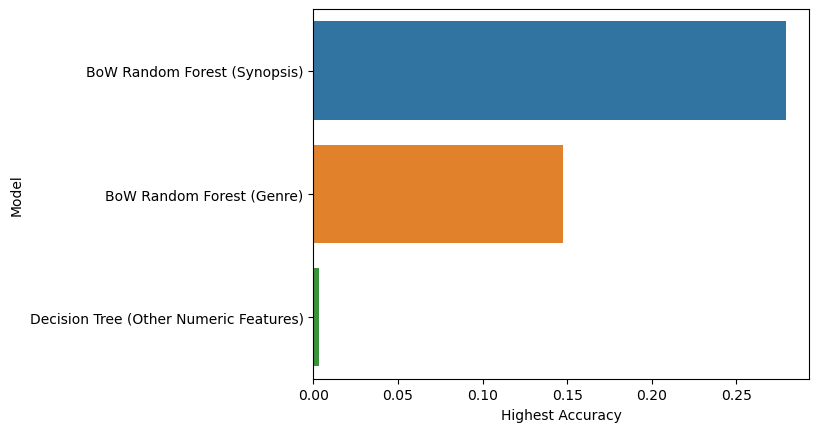

In [83]:
performance_df = pd.DataFrame({"Model": ["BoW Random Forest (Synopsis)", 
                                         "BoW Random Forest (Genre)", 
                                         "Decision Tree (Other Numeric Features)"],
                               "Highest Accuracy": [test_acc, test_acc4, test_acc5]})
sns.barplot(performance_df, x = "Highest Accuracy", y = "Model")

Thinking about it rationally, it would make sense on why the accuracies are so low.                                        
After all, the anime's synopsis and assigned genres shouldn't matter on its quality.                                       
I was rather surprised that the anime's number of episodes, ranking, and score are even more useless on predicting the number of members it would gain.                                                                                          
In the end, what matters significantly more is how it's written, played, and expressed towards the audiences as well as what impact it can leave to the audiences. Visual quality may also matter.                                                 
Unfortunately, the initial DataFrame I've used doesn't have such information.                                              

Hence, I am left with two options:
1. Continue researching on the same research question using different models, fine-tune more parameters, and/or implement other unused CSVs that I also have.
2. Change my research question into something more feasible to answer/predict with the current data I possess like instead of predicting the anime's popularity, perhaps I should predict its score as the score is also worth noting on the anime's quality.

For now, I am leaning a little towards the 2nd option.